In [1]:
#Auto reloading 
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
#Removing indentation issues:
#!autopep8 --in-place --aggressive --aggressive init_params.py
#!autopep8 --in-place --aggressive --aggressive popconstruct.py
#!autopep8 --in-place --aggressive --aggressive generateepochs.py
#!autopep8 --in-place --aggressive --aggressive qvalues.py

In [3]:
!python setup.py build_ext --inplace

running build_ext
copying build/lib.macosx-10.9-x86_64-3.8/agent_timestep.cpython-38-darwin.so -> 


In [4]:
#Importing scripts:
import cbgt as cbgt
from frontendhelpers import * 
from tracetype import *
import init_params as par 
import popconstruct as popconstruct
import qvalues as qval
import generateepochs as gen
import generate_stop_dataframe as gen_stop
from agentmatrixinit import *
#from general_init_codeblocks import *
from agent_timestep import timestep_mutator, multitimestep_mutator
import pdb
import pipeline_creation as pl_creat
import mega_loop as ml
import plotting_functions as plt_func
import plotting_helper_functions as plt_help
import matplotlib.pyplot as plt

data_dir = "./Data/"
figure_dir = "./Figures/"

2022-04-27 11:42:25,434	INFO worker.py:726 -- Connecting to existing Ray cluster at address: 192.168.1.57:6379


# Create pipeline

## Network pipeline 

In [5]:
seed = np.random.randint(0,9999999)
#seed = 7915966
print(seed)
np.random.seed(seed)
to_check = np.random.randint(0,50,10)
print(to_check)

4086296
[ 1  2 45 37 31 47 16 12 14 26]


In [6]:
#Create the whole pipeline.
#This pipeline creates three sub-pipelines: 
#rewards pipeline (rsg), q values pipeline (q_val), network pipeline(pl), stop pipeline (stop)

pl = pl_creat.create_main_pipeline()
mega_l = ml.mega_loop

## Timestep loop

In [7]:
#Adding the timestep loop to the main pipeline
pl.add(mega_l)

# Running the pipeline 

### Go trials (No stop signal) - Fast and Slow Go trials - TRIALWISE

In [ ]:
environment = {
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 300, #number of trials (generateepochs.py)
    'volatility': 1, #frequency of changepoints (generateepochs.py)
    'conflict': 0.7, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 0.85, # 3 instead? how much stimulus the LIP gets at maximum
    'sustainedfraction': 0.75,
    
    #STN
    'stop_signal_present': False,
    'stop_signal_probability': 1.0, #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude': 0.85, # amplitude of the stop signal over base line
    'stop_signal_onset': 40., #in ms #antes 200
    'stop_signal_duration' : 130., 
    'stop_signal_channel': "all", #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
    #D2STR
    'stop_signal_present_2': False,
    'stop_signal_probability_2': 1.0, #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude_2': 1, # amplitude of the stop signal over base line
    'stop_signal_onset_2': 40., #in ms #antes 200
    'stop_signal_duration_2' : 90.,
    'stop_signal_channel_2': "all", #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
    'decision_channel' : '1', #'all'(all channels)
                              # '0' : left channel considered 
                              # '1' : right channel considered
} 

results = cbgt.ExecutionManager(cores=7).run([pl]*1,[environment]*1)

In [ ]:
cbgt.saveResults(results, data_dir+'double_gotrial_1chann_300trials'+'_'+str(seed),['popfreqs','popdata', 'datatables'])

In [ ]:
datatables = cbgt.collateVariable(results,'datatables')

In [ ]:
popfreqs = cbgt.collateVariable(results,'popfreqs')

In [ ]:
results[0]['popfreqs']
plt_func.rename_columns(results[0])
results[0]['popfreqs']

In [ ]:
results_nostop = cbgt.loadResults(data_dir+'stop_data_nostop__8977129')

In [ ]:
results_nostop[0]['datatables'].iloc[70:80]

In [ ]:
results_nostop[0]['popfreqs'].iloc[:,2] #STN

In [ ]:
#Find min_RT - FAST GO - TRIALWISE
RTs = []
for i in results_nostop[0]['datatables'].index:
    RTs.append(results_nostop[0]['datatables']['decisionduration'].iloc[i])
min_RTs = np.min(RTs)

In [ ]:
min_RTs

In [ ]:
RTs

In [ ]:
#Trial min_RT - FAST GO - TRIALWISE

b = np.where(results_nostop[0]['datatables']['decisionduration'] == 79 )
print(b)
print(results_nostop[0]['datatables'].iloc[78])
b = np.arange(results_nostop[0]['datatables'].stimulusstarttime.iloc[78], results_nostop[0]['datatables'].stimulusstarttime.iloc[79]+2)
#print(b)

In [ ]:
#Find max_RT - SLOW GO - TRIALWISE
max_RTs = np.max(RTs)

In [ ]:
max_RTs

In [ ]:
#Trial max_RT - SLOW GO - TRIALWISE
a = np.where(results_nostop[0]['datatables']['decisionduration'] >= 250 )
print(a)
print(results_nostop[0]['datatables'].iloc[55])
a = np.arange(results_nostop[0]['datatables'].stimulusstarttime.iloc[55], results_nostop[0]['datatables'].stimulusstarttime.iloc[56]+2)
print(a)

In [ ]:
#Plot- SLOW GO - STN 
plt.figure(figsize=(4,6))
plt.plot(a, results_nostop[0]['popfreqs'].iloc[results_nostop[0]['datatables']['stimulusstarttime'].iloc[55]:results_nostop[0]['datatables']['stimulusstarttime'].iloc[56]+2, 2], c ='y') #STNE_left
plt.plot(a, results_nostop[0]['popfreqs'].iloc[results_nostop[0]['datatables']['stimulusstarttime'].iloc[55]:results_nostop[0]['datatables']['stimulusstarttime'].iloc[56]+2, 3], c ='b') #STNE_right
plt.vlines(results_nostop[0]['datatables'].stimulusstarttime.iloc[55],0, 60,'k')
if results_nostop[0]['datatables'].decision.iloc[55] == 'right':
    plt.vlines(results_nostop[0]['datatables'].decisiontime.iloc[55],0,60,'b')
elif results_nostop[0]['datatables'].decision.iloc[55] == 'left':
    plt.vlines(results_nostop[0]['datatables'].decisiontime.iloc[55],0,60,'y')
else: 
    plt.vlines(results_nostop[0]['datatables'].decisiontime.iloc[55],0,60,'r')
plt.vlines(results_nostop[0]['datatables'].rewardtime.iloc[55],0,60,'g')
plt.legend(['STNE_left', 'STNE_right'], loc = 'best')
plt.hlines(y=16, xmin=results_nostop[0]['datatables'].stimulusstarttime.iloc[55]+40, xmax=results_nostop[0]['datatables'].stimulusstarttime.iloc[55]+40+150, colors='r', linewidth = 4, linestyle = 'dotted')   
plt.vlines(results_nostop[0]['datatables'].stimulusstarttime.iloc[56],0, 60,'k')            
plt.ylim(15, 60)
plt.savefig('./Berke/FRs_go/FRs_trialwise/FRs_STN_slowgo_'+str(seed)+'.png', dpi=400)

In [ ]:
#Plot- SLOW GO - GPi
plt.figure(figsize=(4,6))
plt.plot(a, results_nostop[0]['popfreqs'].iloc[results_nostop[0]['datatables']['stimulusstarttime'].iloc[55]:results_nostop[0]['datatables']['stimulusstarttime'].iloc[56]+2, 0], c ='y') #GPi_left
plt.plot(a, results_nostop[0]['popfreqs'].iloc[results_nostop[0]['datatables']['stimulusstarttime'].iloc[55]:results_nostop[0]['datatables']['stimulusstarttime'].iloc[56]+2, 1], c ='b') #GPi_right
plt.vlines(results_nostop[0]['datatables'].stimulusstarttime.iloc[55],0, 100,'k')
if results_nostop[0]['datatables'].decision.iloc[55] == 'right':
    plt.vlines(results_nostop[0]['datatables'].decisiontime.iloc[55],0,100,'b')
elif results_nostop[0]['datatables'].decision.iloc[55] == 'left':
    plt.vlines(results_nostop[0]['datatables'].decisiontime.iloc[55],0,100,'y')
else: 
    plt.vlines(results_nostop[0]['datatables'].decisiontime.iloc[55],0,100,'r')
plt.vlines(results_nostop[0]['datatables'].rewardtime.iloc[55],0,100,'g')
plt.legend(['GPi_left', 'GPi_right'], loc = 'upper right')
plt.hlines(y=33, xmin=results_nostop[0]['datatables'].stimulusstarttime.iloc[55]+40, xmax=results_nostop[0]['datatables'].stimulusstarttime.iloc[55]+40+150, colors='r', linewidth = 4, linestyle = 'dotted')   
plt.vlines(results_nostop[0]['datatables'].stimulusstarttime.iloc[56],0, 100,'k')            
plt.ylim(30, 90)
plt.savefig('./Berke/FRs_go/FRs_trialwise/FRs_GPi_slowgo_'+str(seed)+'.png', dpi=400)

In [ ]:
print(b)

In [ ]:
#Plot- FAST GO - STN 
plt.figure(figsize=(4,6))
plt.plot(b, results_nostop[0]['popfreqs'].iloc[results_nostop[0]['datatables']['stimulusstarttime'].iloc[78]:results_nostop[0]['datatables']['stimulusstarttime'].iloc[79]+2, 2], c ='y')
plt.plot(b, results_nostop[0]['popfreqs'].iloc[results_nostop[0]['datatables']['stimulusstarttime'].iloc[78]:results_nostop[0]['datatables']['stimulusstarttime'].iloc[79]+2, 3], c ='b')
plt.vlines(results_nostop[0]['datatables'].stimulusstarttime.iloc[78],0, 60,'k')
if results_nostop[0]['datatables'].decision.iloc[78] == 'right':
    plt.vlines(results_nostop[0]['datatables'].decisiontime.iloc[78],0,60,'b')
elif results_nostop[0]['datatables'].decision.iloc[78] == 'left':
    plt.vlines(results_nostop[0]['datatables'].decisiontime.iloc[78],0,60,'y')
else: 
    plt.vlines(results_nostop[0]['datatables'].decisiontime.iloc[78],0,60,'r')
plt.vlines(results_nostop[0]['datatables'].rewardtime.iloc[78],0,60,'g')
plt.legend(['STNE_left', 'STNE_right'], loc = 'best')
plt.hlines(y=16, xmin=results_nostop[0]['datatables'].stimulusstarttime.iloc[78]+40, xmax=results_nostop[0]['datatables'].stimulusstarttime.iloc[78]+40+150, colors='r', linewidth = 4, linestyle = 'dotted')   
plt.vlines(results_nostop[0]['datatables'].stimulusstarttime.iloc[79],0, 60,'k')            
plt.ylim(15, 60)
plt.savefig('./Berke/FRs_go/FRs_trialwise/FRs_STN_fastgo_'+str(seed)+'.png', dpi=400)

In [ ]:
#Plot- FAST GO - GPi 
plt.figure(figsize=(4,6))
plt.plot(b, results_nostop[0]['popfreqs'].iloc[results_nostop[0]['datatables']['stimulusstarttime'].iloc[78]:results_nostop[0]['datatables']['stimulusstarttime'].iloc[79]+2, 0], c ='y')
plt.plot(b, results_nostop[0]['popfreqs'].iloc[results_nostop[0]['datatables']['stimulusstarttime'].iloc[78]:results_nostop[0]['datatables']['stimulusstarttime'].iloc[79]+2, 1], c ='b')
plt.vlines(results_nostop[0]['datatables'].stimulusstarttime.iloc[78],0, 100,'k')
if results_nostop[0]['datatables'].decision.iloc[78] == 'right':
    plt.vlines(results_nostop[0]['datatables'].decisiontime.iloc[78],0,100,'b')
elif results_nostop[0]['datatables'].decision.iloc[78] == 'left':
    plt.vlines(results_nostop[0]['datatables'].decisiontime.iloc[78],0,100,'y')
else: 
    plt.vlines(results_nostop[0]['datatables'].decisiontime.iloc[78],0,100,'r')
plt.vlines(results_nostop[0]['datatables'].rewardtime.iloc[78],0,100,'g')
plt.legend(['GPi_left', 'GPi_right'], loc = 'upper right')
plt.hlines(y=33, xmin=results_nostop[0]['datatables'].stimulusstarttime.iloc[78]+40, xmax=results_nostop[0]['datatables'].stimulusstarttime.iloc[78]+40+150, colors='r', linewidth = 4, linestyle = 'dotted')   
plt.vlines(results_nostop[0]['datatables'].stimulusstarttime.iloc[79],0, 100,'k')            
plt.ylim(30, 90)
plt.savefig('./Berke/FRs_go/FRs_trialwise/FRs_GPi_fastgo_'+str(seed)+'.png', dpi=400)

### Go trials (No stop signal) - Fast and Slow Go trials - MEAN

In [8]:
environment = {
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 100, #number of trials (generateepochs.py)
    'volatility': 1, #frequency of changepoints (generateepochs.py)
    'conflict': 0.7, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 1.0, # amplitude of the cortical input over base line #0.85
    'sustainedfraction': 0.75,
    
    #STN
    'stop_signal_present': False,
    'stop_signal_probability': 1., #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude': 0.45, # amplitude of the stop signal over base line
    'stop_signal_onset': 35., #in ms #antes 200
    'stop_signal_duration' : 100., 
    'stop_signal_channel': "all", #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signa
    
    #D2STR
    'stop_signal_present_2': False,
    'stop_signal_probability_2': 1., #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude_2': 0.6, # amplitude of the stop signal over base line
    'stop_signal_onset_2': 40., #in ms #antes 200
    'stop_signal_duration_2' : 160.,
    'stop_signal_channel_2': "all", #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
    'decision_channel' : '1', #'all'(all channels)
                              # '0' : left channel considered 
                              # '1' : right channel considered
}

In [9]:
results = cbgt.ExecutionManager(cores=7).run([pl]*1,[environment]*1)

(pid=2078) <class 'float'>
(pid=2078) [19  0 43 47 71 94 91 37 15 76  5 99 34 12 83 68 78 60 74 14  7 89  2 28
(pid=2078)  73 50 72 11 75 61 38 64 53 97  9 16 66 44 24 10 87 92 58 51 17 80 98 48
(pid=2078)  52 39  4 82 65 32 36 90 70 63 88 77 26 29 62 13 31 35 18 84 21 40 27 96
(pid=2078)  25 57 86 41 30 81 23 85  1 56 54 22 46 20 55 93 95 33 42 79 67 45 49 69
(pid=2078)   6 59  8  3]
(pid=2078) <class 'float'>
(pid=2078) [19  0 43 47 71 94 91 37 15 76  5 99 34 12 83 68 78 60 74 14  7 89  2 28
(pid=2078)  73 50 72 11 75 61 38 64 53 97  9 16 66 44 24 10 87 92 58 51 17 80 98 48
(pid=2078)  52 39  4 82 65 32 36 90 70 63 88 77 26 29 62 13 31 35 18 84 21 40 27 96
(pid=2078)  25 57 86 41 30 81 23 85  1 56 54 22 46 20 55 93 95 33 42 79 67 45 49 69
(pid=2078)   6 59  8  3]
(pid=2078) <class 'float'>
(pid=2078) [49 96 35 87 26 91 83 95 84  5 32 41 86 38 29 44 23 17 43 48  0 76 45 10
(pid=2078)  94 66 93 60 71 67 82 19 40 70 24 11 42 75 14 98 90  9 28 12 59 62 72 85
(pid=2078)  33 51 81 92 64 16

(pid=2078) 14 17 0.8334`
(pid=2078) 15 12 0.8334`
(pid=2078) 14 17 0.8334`
(pid=2078) 15 12 0.8334`
(pid=2078) 15 13 0.8334`
(pid=2078) 15 17 0.8334`
(pid=2078) 15 13 0.8334`
(pid=2078) 15 17 0.8334`
(pid=2078) phasetimer 186
(pid=2078) globaltimer 186
(pid=2078) gateFRs [32.44444444 30.66666667]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 186
(pid=2078) globaltimer 186
(pid=2078) gateFRs [32.44444444 30.66666667]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 301
(pid=2078) globaltimer 487
(pid=2078) trial_num 0
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 0
(pid=2078) TRIAL WISE Q DF left     0.5
(pid=2078) right    0.5
(pid=2078) Name: 0, dtype: float64
(pid=2078) phasetimer 301
(pid=2078) globaltimer 487
(pid=2078) trial_num 0
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=207

(pid=2078) phasetimer 136
(pid=2078) globaltimer 6336
(pid=2078) gateFRs [30.44444444 30.22222222]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 136
(pid=2078) globaltimer 6336
(pid=2078) gateFRs [30.44444444 30.22222222]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 301
(pid=2078) globaltimer 6637
(pid=2078) trial_num 6
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 6
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.596131
(pid=2078) Name: 0, dtype: float64
(pid=2078) phasetimer 301
(pid=2078) globaltimer 6637
(pid=2078) trial_num 6
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 6
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.596131
(pid=2078) Name

(pid=2078) phasetimer 144
(pid=2078) globaltimer 12692
(pid=2078) gateFRs [28.44444444 30.22222222]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 144
(pid=2078) globaltimer 12692
(pid=2078) gateFRs [28.44444444 30.22222222]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 301
(pid=2078) globaltimer 12993
(pid=2078) trial_num 12
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 12
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.484424
(pid=2078) Name: 0, dtype: float64
(pid=2078) phasetimer 301
(pid=2078) globaltimer 12993
(pid=2078) trial_num 12
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 12
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.484424
(pid=20

(pid=2078) phasetimer 128
(pid=2078) globaltimer 18846
(pid=2078) gateFRs [27.77777778 30.44444444]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 128
(pid=2078) globaltimer 18846
(pid=2078) gateFRs [27.77777778 30.44444444]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 301
(pid=2078) globaltimer 19147
(pid=2078) trial_num 18
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 18
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.939291
(pid=2078) Name: 0, dtype: float64
(pid=2078) phasetimer 301
(pid=2078) globaltimer 19147
(pid=2078) trial_num 18
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 18
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.939291
(pid=20

(pid=2078) phasetimer 83
(pid=2078) globaltimer 24913
(pid=2078) gateFRs [27.33333333 30.44444444]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 83
(pid=2078) globaltimer 24913
(pid=2078) gateFRs [27.33333333 30.44444444]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 301
(pid=2078) globaltimer 25214
(pid=2078) trial_num 24
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 24
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.046333
(pid=2078) Name: 0, dtype: float64
(pid=2078) phasetimer 301
(pid=2078) globaltimer 25214
(pid=2078) trial_num 24
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 24
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.046333
(pid=2078

(pid=2078) phasetimer 146
(pid=2078) globaltimer 31065
(pid=2078) gateFRs [32.         30.22222222]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 146
(pid=2078) globaltimer 31065
(pid=2078) gateFRs [32.         30.22222222]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 301
(pid=2078) globaltimer 31366
(pid=2078) trial_num 30
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 30
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.702903
(pid=2078) Name: 0, dtype: float64
(pid=2078) phasetimer 301
(pid=2078) globaltimer 31366
(pid=2078) trial_num 30
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 30
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.702903
(pid=20

(pid=2078) phasetimer 154
(pid=2078) globaltimer 37253
(pid=2078) gateFRs [30.         30.22222222]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 154
(pid=2078) globaltimer 37253
(pid=2078) gateFRs [30.         30.22222222]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 301
(pid=2078) globaltimer 37554
(pid=2078) trial_num 36
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 36
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.974603
(pid=2078) Name: 0, dtype: float64
(pid=2078) phasetimer 301
(pid=2078) globaltimer 37554
(pid=2078) trial_num 36
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 36
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.974603
(pid=20

(pid=2078) phasetimer 86
(pid=2078) globaltimer 43580
(pid=2078) gateFRs [26.22222222 30.22222222]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 86
(pid=2078) globaltimer 43580
(pid=2078) gateFRs [26.22222222 30.22222222]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 301
(pid=2078) globaltimer 43881
(pid=2078) trial_num 42
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 42
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.682574
(pid=2078) Name: 0, dtype: float64
(pid=2078) phasetimer 301
(pid=2078) globaltimer 43881
(pid=2078) trial_num 42
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 42
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.682574
(pid=2078

(pid=2078) phasetimer 101
(pid=2078) globaltimer 49869
(pid=2078) gateFRs [31.11111111 30.88888889]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 101
(pid=2078) globaltimer 49869
(pid=2078) gateFRs [31.11111111 30.88888889]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 301
(pid=2078) globaltimer 50170
(pid=2078) trial_num 48
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 48
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.730575
(pid=2078) Name: 0, dtype: float64
(pid=2078) phasetimer 301
(pid=2078) globaltimer 50170
(pid=2078) trial_num 48
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 48
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.730575
(pid=20

(pid=2078) phasetimer 98
(pid=2078) globaltimer 55928
(pid=2078) gateFRs [29.11111111 30.44444444]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 98
(pid=2078) globaltimer 55928
(pid=2078) gateFRs [29.11111111 30.44444444]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 301
(pid=2078) globaltimer 56229
(pid=2078) trial_num 54
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 54
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.974802
(pid=2078) Name: 0, dtype: float64
(pid=2078) phasetimer 301
(pid=2078) globaltimer 56229
(pid=2078) trial_num 54
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 54
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.974802
(pid=2078

(pid=2078) phasetimer 84
(pid=2078) globaltimer 62135
(pid=2078) gateFRs [29.33333333 30.22222222]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 84
(pid=2078) globaltimer 62135
(pid=2078) gateFRs [29.33333333 30.22222222]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 301
(pid=2078) globaltimer 62436
(pid=2078) trial_num 60
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 60
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.674933
(pid=2078) Name: 0, dtype: float64
(pid=2078) phasetimer 301
(pid=2078) globaltimer 62436
(pid=2078) trial_num 60
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 60
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.674933
(pid=2078

(pid=2078) phasetimer 100
(pid=2078) globaltimer 68369
(pid=2078) gateFRs [24.66666667 30.22222222]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 100
(pid=2078) globaltimer 68369
(pid=2078) gateFRs [24.66666667 30.22222222]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 301
(pid=2078) globaltimer 68670
(pid=2078) trial_num 66
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 66
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.243081
(pid=2078) Name: 0, dtype: float64
(pid=2078) phasetimer 301
(pid=2078) globaltimer 68670
(pid=2078) trial_num 66
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 66
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.243081
(pid=20

(pid=2078) phasetimer 92
(pid=2078) globaltimer 74445
(pid=2078) gateFRs [31.33333333 30.44444444]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 92
(pid=2078) globaltimer 74445
(pid=2078) gateFRs [31.33333333 30.44444444]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 301
(pid=2078) globaltimer 74746
(pid=2078) trial_num 72
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 72
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.651787
(pid=2078) Name: 0, dtype: float64
(pid=2078) phasetimer 301
(pid=2078) globaltimer 74746
(pid=2078) trial_num 72
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 72
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.651787
(pid=2078

(pid=2078) phasetimer 113
(pid=2078) globaltimer 80602
(pid=2078) gateFRs [31.55555556 30.44444444]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 113
(pid=2078) globaltimer 80602
(pid=2078) gateFRs [31.55555556 30.44444444]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 301
(pid=2078) globaltimer 80903
(pid=2078) trial_num 78
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 78
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    1.031417
(pid=2078) Name: 0, dtype: float64
(pid=2078) phasetimer 301
(pid=2078) globaltimer 80903
(pid=2078) trial_num 78
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 78
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    1.031417
(pid=20

(pid=2078) phasetimer 150
(pid=2078) globaltimer 86755
(pid=2078) gateFRs [27.77777778 30.22222222]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 150
(pid=2078) globaltimer 86755
(pid=2078) gateFRs [27.77777778 30.22222222]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 301
(pid=2078) globaltimer 87056
(pid=2078) trial_num 84
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 84
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.384952
(pid=2078) Name: 0, dtype: float64
(pid=2078) phasetimer 301
(pid=2078) globaltimer 87056
(pid=2078) trial_num 84
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 84
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.384952
(pid=20

(pid=2078) phasetimer 122
(pid=2078) globaltimer 92964
(pid=2078) gateFRs [26.         30.22222222]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 122
(pid=2078) globaltimer 92964
(pid=2078) gateFRs [26.         30.22222222]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 301
(pid=2078) globaltimer 93265
(pid=2078) trial_num 90
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 90
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.010656
(pid=2078) Name: 0, dtype: float64
(pid=2078) phasetimer 301
(pid=2078) globaltimer 93265
(pid=2078) trial_num 90
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 90
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.010656
(pid=20

(pid=2078) phasetimer 134
(pid=2078) globaltimer 99214
(pid=2078) gateFRs [28.88888889 30.66666667]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 134
(pid=2078) globaltimer 99214
(pid=2078) gateFRs [28.88888889 30.66666667]
(pid=2078) thresholds_crossed [1]
(pid=2078) other_action 0
(pid=2078) phasetimer 301
(pid=2078) globaltimer 99515
(pid=2078) trial_num 96
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 96
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.063021
(pid=2078) Name: 0, dtype: float64
(pid=2078) phasetimer 301
(pid=2078) globaltimer 99515
(pid=2078) trial_num 96
(pid=2078)   action
(pid=2078) 0   left
(pid=2078) 1  right
(pid=2078) chosen_action right
(pid=2078) Q_support_params.chosen_action[0] right
(pid=2078) trial_num 96
(pid=2078) TRIAL WISE Q DF left     0.500000
(pid=2078) right    0.063021
(pid=20

In [10]:
cbgt.saveResults(results, './Data/1chann_sample_100trials_gotrials_seed'+str(seed),['popfreqs','popdata', 'datatables'])

In [11]:
results[0].keys()

dict_keys(['params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'newpathways', 'Q_support_params', 'Q_df', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'sustainedfraction', 'stop_signal_present', 'stop_signal_probability', 'stop_signal_amplitude', 'stop_signal_onset', 'stop_signal_duration', 'stop_signal_channel', 'stop_signal_present_2', 'stop_signal_probability_2', 'stop_signal_amplitude_2', 'stop_signal_onset_2', 'stop_signal_duration_2', 'stop_signal_channel_2', 'decision_channel', 'actionchannels', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'block', 'stop_df', 'stop_channels_df', 'stop_amplitude_df', 'stop_onset_df', 'stop_duration_df', 'stop_df_2', 'stop_channels_df_2', 'stop_amplitude_df_2', 'stop_onset_df_2', 'stop_duration_df_2', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim', 'dpmndefaults', 'd1defaults', 'd2defaults', 'popdata', 'pathways', 'connectivit

In [12]:
datatables = cbgt.collateVariable(results,'datatables')
datatables[0]

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,right,0,186,186,487,487,right,1.0
1,right,1088,1205,117,418,1506,left,1.0
2,right,2107,2224,117,418,2525,left,0.0
3,right,3126,3238,112,413,3539,right,1.0
4,right,4140,4246,106,407,4547,left,0.0
...,...,...,...,...,...,...,...,...
95,right,98087,98178,91,392,98479,left,0.0
96,right,99080,99214,134,435,99515,left,0.0
97,right,100116,100196,80,381,100497,left,0.0
98,right,101098,101240,142,443,101541,left,0.0


In [13]:
truetrials_number = 0
truetrials_array = []
stop_percentage = []
none_percentage = []
stop_number = 0
none_number = 0
for i in datatables[0].index:
    if datatables[0].iloc[i]['decisionduration'] > results[0]['stop_signal_onset']:
        truetrials_number += 1
    if datatables[0].iloc[i]['decision'] == 'stop':
        stop_number += 1
    if datatables[0].iloc[i]['decision'] == 'none':
        none_number += 1
truetrials_array.append(truetrials_number)
stop_percentage.append(stop_number/truetrials_number)
none_percentage.append(none_number/truetrials_number)
print('true trials', truetrials_number)
print('stop numbers', stop_number)
print('stop percentage', stop_percentage)
print('none numbers', none_number)
print('none percentage', none_percentage)

true trials 100
stop numbers 0
stop percentage [0.0]
none numbers 1
none percentage [0.01]


In [17]:
fast = 0
slow = 0
for i in datatables[0].index:
    if datatables[0].decisionduration.iloc[i] < 140: 
        fast += 1
    elif datatables[0].decision.iloc[i] != 'none': 
        slow += 1
print(fast)
print(slow)

70
29


In [ ]:
plt.figure(figsize=(20,10))
i = np.arange(0,300)
plt.bar([i for i in np.arange(0,300)], datatables[0].decisionduration.iloc[i], width=0.8, align='center')
#plt.axis([0, 160, 0, 300]) 
#axis([xmin,xmax,ymin,ymax])
plt.xlabel('Trials')
plt.ylabel('Decision duration [ms]')
plt.title('RTs')
plt.savefig('./Figures/'+'RTs'+'_.png')
plt.show()

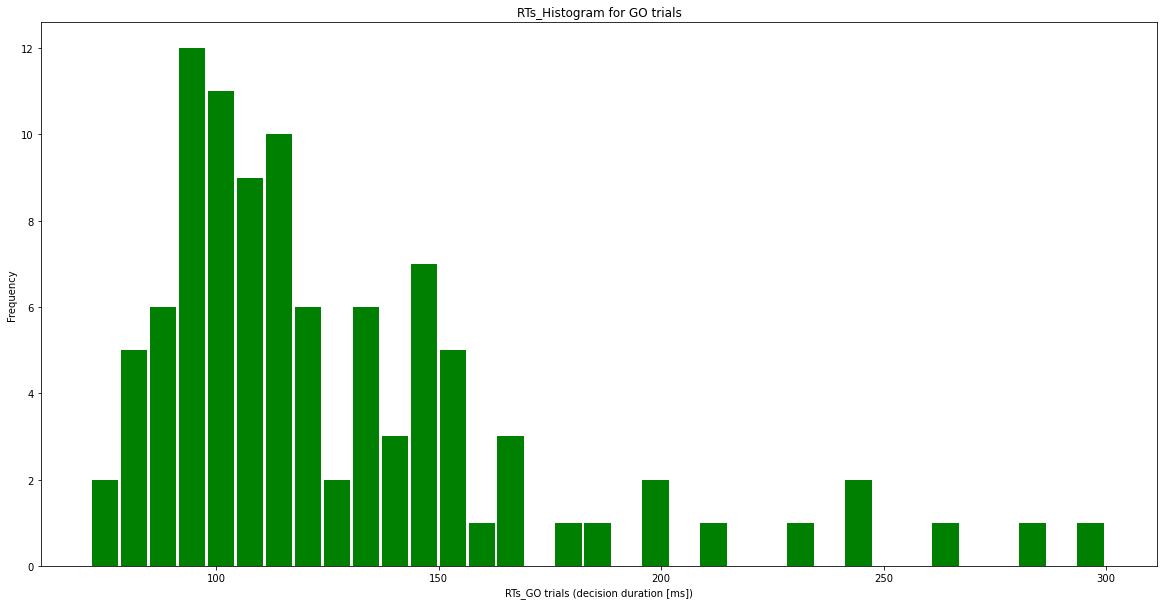

In [22]:
rts = []
for i in datatables[0].index:
    if datatables[0].decision.iloc[i] != 'none':
        rts.append(datatables[0].decisionduration.iloc[i])
plt.figure(figsize=(20,10))   
plt.hist(rts, bins = 35, histtype ='bar', align = 'mid', color = 'g', width = 6)
plt.xlabel('RTs_GO trials (decision duration [ms])')
plt.ylabel('Frequency')
plt.title('RTs_Histogram for GO trials')
plt.savefig('./Figures/'+'GO_RTs_hist'+'_.png')
plt.show()

In [23]:
fast = 0
slow = 0
for i in datatables[0].index:
    if datatables[0].decisionduration.iloc[i] < 140: 
        fast += 1
    elif datatables[0].decision.iloc[i] != 'none': 
        slow += 1
print(fast)
print(slow)

70
29


In [24]:
ratedf = results[0]['popfreqs']
#len(ratedf)
ratedf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Time (ms)
0,83.333333,72.444444,24.111111,23.555556,46.966667,47.466667,11.466667,6.200000,1.777778,3.555556,2.444444,1.777778,0.000000,0.000000,5.333333,8.222222,7.777778,0.716846,0
1,82.222222,72.888889,24.155556,23.711111,47.366667,47.166667,11.533333,6.266667,1.777778,3.777778,2.444444,1.777778,0.000000,0.000000,5.333333,8.222222,7.777778,0.537634,1
2,81.777778,72.444444,24.044444,23.822222,47.333333,47.333333,11.600000,6.333333,1.555556,3.777778,2.444444,1.777778,0.000000,0.000000,5.111111,7.777778,8.000000,0.537634,2
3,81.555556,71.111111,24.155556,23.688889,47.433333,47.133333,11.466667,6.466667,1.555556,3.777778,2.444444,1.777778,0.000000,0.000000,5.111111,7.777778,8.000000,0.537634,3
4,81.777778,70.888889,24.022222,23.755556,47.433333,46.633333,11.333333,6.466667,1.555556,3.777778,2.666667,2.222222,0.000000,0.000000,5.333333,7.777778,7.555556,0.537634,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103141,84.444444,82.222222,24.400000,22.644444,44.966667,45.800000,10.600000,8.133333,1.555556,1.777778,4.222222,4.444444,2.941176,3.839869,7.777778,10.222222,8.888889,2.508961,103141
103142,83.777778,82.000000,24.444444,22.866667,45.533333,45.833333,10.933333,8.000000,1.777778,2.000000,4.222222,4.000000,3.104575,3.839869,7.111111,10.222222,9.555556,2.508961,103142
103143,82.888889,83.333333,24.377778,23.000000,45.466667,45.933333,10.933333,7.933333,1.777778,2.000000,4.222222,4.222222,3.022876,3.839869,6.888889,10.444444,9.111111,2.688172,103143
103144,82.666667,82.888889,24.400000,22.822222,45.000000,45.900000,10.933333,8.000000,1.777778,2.222222,4.444444,4.222222,3.104575,3.839869,7.111111,10.222222,9.111111,2.598566,103144


In [25]:
import statistics

plt_func.rename_columns(results[0])
ratedf = results[0]['popfreqs']
keysInicials=[]
keysFinals=[]
datatables = cbgt.collateVariable(results,'datatables')

#find the inicial key of each trial
for j in datatables[0].stimulusstarttime:
    i=0
    noTrobat=0
    while noTrobat==0 and i<len(ratedf['Time (ms)']):
        if ratedf['Time (ms)'][i]<j:
            i=i+1
        else: 
            noTrobat=1 
    keysInicials.append(i)

keysInicials_fastgo = []
keysInicials_slowgo = []

for z in datatables[0].index: #fast go
    if datatables[0].decisionduration[z] < 140 and datatables[0].decision[z] != 'none':
        keysInicials_fastgo.append(datatables[0].stimulusstarttime[z])

for z in datatables[0].index: #slow go
    if datatables[0].decisionduration[z] >= 140 and datatables[0].decision[z] != 'none':
        keysInicials_slowgo.append(datatables[0].stimulusstarttime[z])


#print('Inicials', keysInicials)
#print('Inicials Fast Go', keysInicials_fastgo)
#print('Inicials Slow Go', keysInicials_slowgo)

#find the final key of each trial

for j in datatables[0].rewardtime:
    i=0
    noTrobat=0
    while noTrobat==0 and i<len(ratedf['Time (ms)']):
        if ratedf['Time (ms)'][i]<j:
            i=i+1
        else: 
            noTrobat=1    
    keysFinals.append(i-1)  
    
keysFinals_fastgo = []
keysFinals_slowgo = []

for z in datatables[0].index: #fast go
    if datatables[0].decisionduration[z] < 140 and datatables[0].decision[z] != 'none':
        keysFinals_fastgo.append(datatables[0].rewardtime[z])
    
for z in datatables[0].index: #slow go
    if datatables[0].decisionduration[z] >= 140 and datatables[0].decision[z] != 'none':
        keysFinals_slowgo.append(datatables[0].rewardtime[z])

#print('Finals', keysFinals)
#print('Finals Fast Go', keysFinals_fastgo)
#print('Finals Slow Go', keysFinals_slowgo)

#find the length of the largest trial 
dif=[]
for i in range(0,len(keysInicials_slowgo)):
    dif.append(keysFinals_slowgo[i]-keysInicials_slowgo[i])
L=max(dif)
print(L)

#find the length of the largest trial of the Fast go trials
dif_fast=[]
for i in range(0,len(keysInicials_fastgo)):
    dif_fast.append(keysFinals_fastgo[i]-keysInicials_fastgo[i])
L_fast=max(dif_fast)
print(L_fast)

601
440


In [26]:
print(len(keysInicials_slowgo))
print(len(keysInicials_fastgo))

29
70


In [ ]:
for i in range(len(dif)): 
    if dif[i] == 60:
        print(i)
#print(tr)
print(dif)

In [27]:
print(len(keysFinals_slowgo))
print(len(keysFinals_fastgo))

29
70


### SLOW GO trials 

In [28]:
#SLOW GO trials - DATATABLES + FRs
rows_list = []
ratedf = results[0]['popfreqs']
ratedf_sg = pd.DataFrame()
for row in datatables[0].index: 
    if datatables[0].decisionduration[row] >= 140 and datatables[0].decision[row] != 'none':
        dict_aux = {}
        dict_aux.update(datatables[0].iloc[row]) 
        rows_list.append(dict_aux)
        ratedf_sg = ratedf_sg.append(ratedf[datatables[0].iloc[row]['stimulusstarttime']:datatables[0].iloc[row]['rewardtime']+601])
slow_go = pd.DataFrame(rows_list) 
print(len(slow_go))
print(len(ratedf_sg))

29
31433


In [29]:
#become all datatables of the same length

# SLOW GO 

Mean_newDic={}
Std_newDic={}

for BGregion in ratedf_sg:
    
    S=[]
    for i in range(0,len(keysInicials_slowgo)):
        region_i=ratedf[keysInicials_slowgo[i]:keysFinals_slowgo[i]].to_dict()
        region_i=list(region_i[BGregion].values())
        #print(region_i)
        li=len(region_i)
        #print(li)
        j=1
        while j<=L-li:
            region_i = region_i + [-1]
            j=j+1
            #print('dentro')
        S.append(region_i)
    #print(S)
    mean_t=[]
    std_t=[]
    for i in range(0,L):
        new_list=[]
        for ll in S:
            #print(ll)
            if ll[i]!= -1:
                new_list.append(ll[i])
                #print(new_list)
                #print(len(new_list))
                #print(ll[i-1])
        if len(new_list) > 1:
            mean_t.append(statistics.mean(new_list)) #sum(new_list)/len(new_list))
            std_t.append(statistics.stdev(new_list))
        else:
            for ll in S: 
                if ll[i]!= -1:
                    mean_t.append(ll[i])
                    std_t.append(0)
    
    Mean_newDic[BGregion]=mean_t
    Std_newDic[BGregion]=std_t
    
#print(Mean_newDic)
#print()
#print('new_list', new_list)

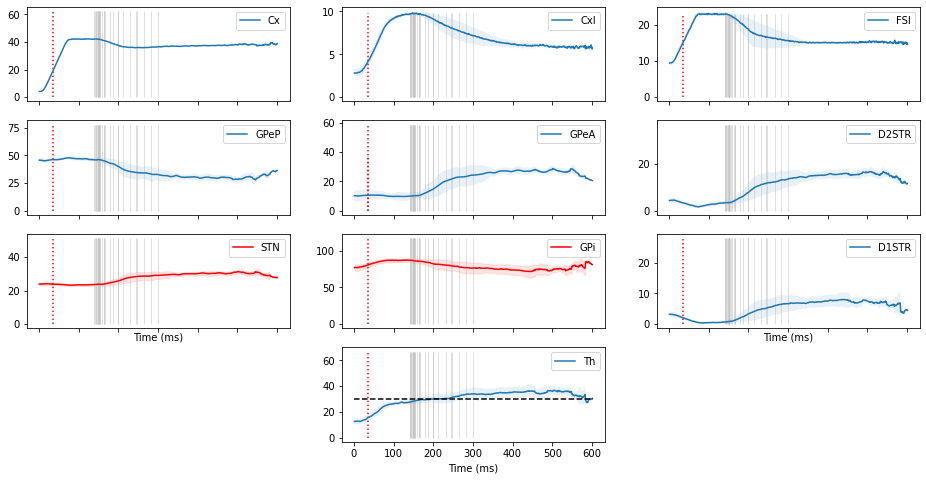

In [30]:
#SLOW GO trials - MEAN FRs plots

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 3, figsize=(16,8), sharex=True)

i=0
tmean=[]
while i<len(Mean_newDic['Cx_left']):
    tmean.append(len(Mean_newDic['Cx_left'])-i)
    i=i+1
tmean.sort()
#print(tmean)
    
#ax1[0].plot(mean_t,Mean_newDic['Cx_left'])
#ax1[0].fill_between(tmean,np.subtract(Mean_newDic['Cx_left'],Std_newDic['Cx_left']),np.add(Mean_newDic['Cx_left'],Std_newDic['Cx_left']),alpha=.1)
ax1[0].plot(tmean,Mean_newDic['Cx_right'])
#ax1[0].fill_between(tmean,np.subtract(Mean_newDic['Cx_right'],Std_newDic['Cx_right']),np.add(Mean_newDic['Cx_right'],Std_newDic['Cx_right']),alpha=.1)
ax1[0].legend(['Cx']) #(['Cx_A','Cx_B'])
#ax1[0].plot([0,0],[0,max(Mean_newDic['Cx_right'])+20],color='k')
for i in range(0,len(slow_go)):
    ax1[0].vlines(slow_go.decisionduration[i], 0, max(Mean_newDic['Cx_right'])+20, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax1[0].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['Cx_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')


ax1[1].plot(tmean,Mean_newDic['CxI_common'])
ax1[1].fill_between(tmean,np.subtract(Mean_newDic['CxI_common'],Std_newDic['CxI_common']),np.add(Mean_newDic['CxI_common'],Std_newDic['CxI_common']),alpha=.1)
ax1[1].legend(['CxI'])
#ax1[1].plot([0,0],[0,max(Mean_newDic['CxI_common'])],color='k')
for i in range(0,len(slow_go)):
    ax1[1].vlines(slow_go.decisionduration[i], 0, max(Mean_newDic['CxI_common']), color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax1[1].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['CxI_common']), colors='r', linewidth = 1.5, linestyle = 'dotted')
    
ax1[2].plot(tmean,Mean_newDic['FSI_common'])
ax1[2].fill_between(tmean,np.subtract(Mean_newDic['FSI_common'],Std_newDic['FSI_common']),np.add(Mean_newDic['FSI_common'],Std_newDic['FSI_common']),alpha=.1)
ax1[2].legend(['FSI'])
#ax1[2].plot([0,0],[0,max(Mean_newDic['FSI_common'])],color='k')
for i in range(0,len(slow_go)):
    ax1[2].vlines(slow_go.decisionduration[i], 0, max(Mean_newDic['FSI_common']), color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax1[2].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['FSI_common']), colors='r', linewidth = 1.5, linestyle = 'dotted')

#ax2[0].plot(tmean,Mean_newDic['GPeP_left'])
#ax2[0].fill_between(tmean,np.subtract(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),np.add(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),alpha=.1)
ax2[0].plot(tmean,Mean_newDic['GPeP_right'])
ax2[0].fill_between(tmean,np.subtract(Mean_newDic['GPeP_right'],Std_newDic['GPeP_right']),np.add(Mean_newDic['GPeP_right'],Std_newDic['GPeP_right']),alpha=.1)
ax2[0].legend(['GPeP']) #(['GPe_left','GPe_right'])
#ax2[0].plot([0,0],[0,max(Mean_newDic['GPeP_right'])+30],color='k')
for i in range(0,len(slow_go)):
    ax2[0].vlines(slow_go.decisionduration[i], 0, max(Mean_newDic['GPeP_right'])+30, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax2[0].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['GPeP_right'])+30, colors='r', linewidth = 1.5, linestyle = 'dotted')

#ax2[0].plot(tmean,Mean_newDic['GPeP_left'])
#ax2[0].fill_between(tmean,np.subtract(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),np.add(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),alpha=.1)
ax2[1].plot(tmean,Mean_newDic['GPeA_right'])
ax2[1].fill_between(tmean,np.subtract(Mean_newDic['GPeA_right'],Std_newDic['GPeA_right']),np.add(Mean_newDic['GPeA_right'],Std_newDic['GPeA_right']),alpha=.1)
ax2[1].legend(['GPeA']) #(['GPe_left','GPe_right'])
#ax2[0].plot([0,0],[0,max(Mean_newDic['GPeP_right'])+30],color='k')
for i in range(0,len(slow_go)):
    ax2[1].vlines(slow_go.decisionduration[i], 0, max(Mean_newDic['GPeA_right'])+30, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax2[1].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['GPeA_right'])+30, colors='r', linewidth = 1.5, linestyle = 'dotted')

#ax2[1].plot(tmean,Mean_newDic['D2STR_left'])
#ax2[1].fill_between(tmean,np.subtract(Mean_newDic['D2STR_left'],Std_newDic['D2STR_left']),np.add(Mean_newDic['D2STR_left'],Std_newDic['D2STR_left']),alpha=.1)
ax2[2].plot(tmean,Mean_newDic['D2STR_right'])
ax2[2].fill_between(tmean,np.subtract(Mean_newDic['D2STR_right'],Std_newDic['D2STR_right']),np.add(Mean_newDic['D2STR_right'],Std_newDic['D2STR_right']),alpha=.1)
ax2[2].legend(['D2STR']) #(['iSPN_A','iSPN_B'])
#ax2[1].plot([0,0],[0,max(Mean_newDic['D2STR_right'])+20],color='k')
for i in range(0,len(slow_go)):
    ax2[2].vlines(slow_go.decisionduration[i], 0, max(Mean_newDic['D2STR_right'])+20, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax2[1].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['D2STR_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')

#ax2[2].plot(tmean, Mean_newDic['D1STR_left'])
#ax2[2].fill_between(tmean,np.subtract(Mean_newDic['D1STR_left'],Std_newDic['D1STR_left']),np.add(Mean_newDic['D1STR_left'],Std_newDic['D1STR_left']),alpha=.1)
ax3[2].plot(tmean,Mean_newDic['D1STR_right'])
ax3[2].fill_between(tmean,np.subtract(Mean_newDic['D1STR_right'],Std_newDic['D1STR_right']),np.add(Mean_newDic['D1STR_right'],Std_newDic['D1STR_right']),alpha=.1)
ax3[2].legend(['D1STR']) #(['dSPN_A','dSPN_B'])
#ax2[2].plot([0,0],[0,max(Mean_newDic['D1STR_right'])+20],color='k')
for i in range(0,len(slow_go)):
    ax3[2].vlines(slow_go.decisionduration[i], 0, max(Mean_newDic['D1STR_right'])+20, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax3[2].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['D1STR_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax3[2].set_xlabel('Time (ms)')

#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax3[0].plot(tmean,Mean_newDic['STNE_right'], color = 'r')
ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_right'],Std_newDic['STNE_right']),np.add(Mean_newDic['STNE_right'],Std_newDic['STNE_right']),color='r', alpha=.1)
ax3[0].legend(['STN']) #(['STN_A','STN_B'])
ax3[0].set_xlabel('Time (ms)')
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(slow_go)):
    ax3[0].vlines(slow_go.decisionduration[i], 0, max(Mean_newDic['STNE_right'])+20, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax3[0].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['STNE_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')
    
#ax3[1].plot(tmean,Mean_newDic['GPi_left'])
#ax3[1].fill_between(tmean,np.subtract(Mean_newDic['GPi_left'],Std_newDic['GPi_left']),np.add(Mean_newDic['GPi_left'],Std_newDic['GPi_left']),alpha=.1)
ax3[1].plot(tmean,Mean_newDic['GPi_right'],  color = 'r')
ax3[1].fill_between(tmean,np.subtract(Mean_newDic['GPi_right'],Std_newDic['GPi_right']),np.add(Mean_newDic['GPi_right'],Std_newDic['GPi_right']),color='r',alpha=.1)
ax3[1].legend(['GPi']) #(['GPi_A','GPi_B'])
#ax3[1].set_xlabel('Time (ms)')
#ax3[1].plot([0,0],[0,max(Mean_newDic['GPi_right'])+30],color='k')
for i in range(0,len(slow_go)):
    ax3[1].vlines(slow_go.decisionduration[i], 0, max(Mean_newDic['GPi_right'])+30, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax3[1].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['GPi_right'])+30, colors='r', linewidth = 1.5, linestyle = 'dotted')

#ax3[2].plot(tmean,Mean_newDic['Th_left'])
#ax3[2].fill_between(tmean,np.subtract(Mean_newDic['Th_left'],Std_newDic['Th_left']),np.add(Mean_newDic['Th_left'],Std_newDic['Th_left']),alpha=.1)
ax4[1].plot(tmean,Mean_newDic['Th_right'])
ax4[1].fill_between(tmean,np.subtract(Mean_newDic['Th_right'],Std_newDic['Th_right']),np.add(Mean_newDic['Th_right'],Std_newDic['Th_right']),alpha=.1)
ax4[1].plot([0, 602],[30, 30],linestyle='dashed',color='k')
ax4[1].legend(['Th']) #(['Th_A','Th_B'])
ax4[1].set_xlabel('Time (ms)')
#ax3[2].plot([0,0],[0,max(Mean_newDic['Th_right'])+10],color='k')
for i in range(0,len(slow_go)):
    ax4[1].vlines(slow_go.decisionduration[i], 0, max(Mean_newDic['Th_right'])+30, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax4[1].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['Th_right'])+30, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax4[0].set_axis_off()
ax4[2].set_axis_off()

plt.savefig('./Figures/meanFR_trials_1chann_slowgo_300trials.png', dpi=400)

### FAST GO trials

In [31]:
#FAST GO trials - DATATABLES + FRs
rows_list = []
ratedf = results[0]['popfreqs']
ratedf_fg = pd.DataFrame()
for row in datatables[0].index:
    if datatables[0].decisionduration[row] < 140: 
        dict_aux = {}
        dict_aux.update(datatables[0].iloc[row]) 
        rows_list.append(dict_aux)
        ratedf_fg = ratedf_fg.append(ratedf[datatables[0].iloc[row]['stimulusstarttime']:datatables[0].iloc[row]['rewardtime']+601])
fast_go = pd.DataFrame(rows_list) 
print(len(fast_go))
print(len(ratedf_fg))

70
70509


In [32]:
#become all datatables of the same length

# FAST GO 

Mean_newDic={}
Std_newDic={}

for BGregion in ratedf_fg:
    
    S=[]
    for i in range(0,len(keysInicials_fastgo)):
        region_i=ratedf[keysInicials_fastgo[i]:keysFinals_fastgo[i]].to_dict()
        region_i=list(region_i[BGregion].values())
        #print(region_i)
        li=len(region_i)
        #print(li)
        j=1
        while j<=L-li:
            region_i = region_i + [-1]
            j=j+1
            #print('dentro')
        S.append(region_i)
    #print(S)
    mean_t=[]
    std_t=[]
    for i in range(0,L):
        new_list=[]
        for ll in S:
            #print(ll)
            if ll[i]!= -1:
                new_list.append(ll[i])
                #print(new_list)
                #print(len(new_list))
                #print(ll[i-1])
        if len(new_list) > 1:
            mean_t.append(statistics.mean(new_list)) #sum(new_list)/len(new_list))
            std_t.append(statistics.stdev(new_list))
        else:
            for ll in S: 
                if ll[i]!= -1:
                    mean_t.append(ll[i])
                    std_t.append(0)
    
    Mean_newDic[BGregion]=mean_t
    Std_newDic[BGregion]=std_t
    
#print(Mean_newDic)
#print()
#print('new_list', new_list)

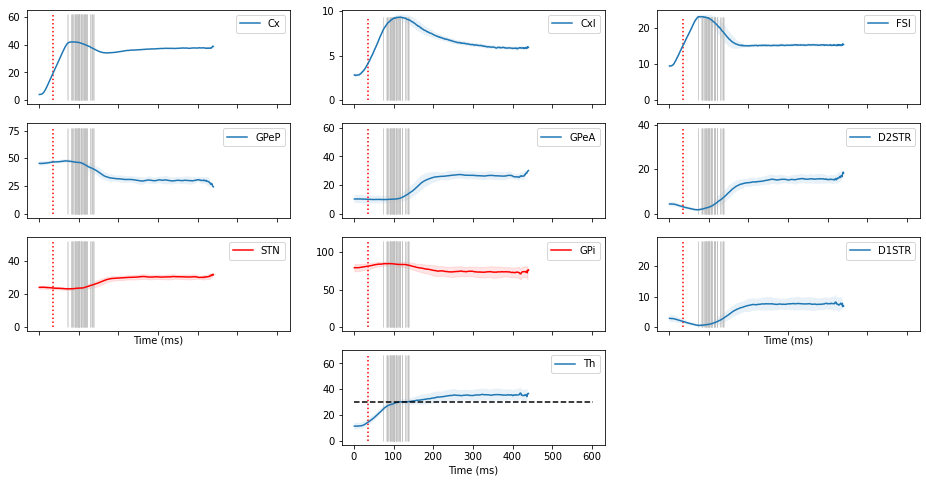

In [34]:
#FAST GO trials - MEAN FRs plots

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 3, figsize=(16,8), sharex=True)

i=0
tmean=[]
while i<len(Mean_newDic['Cx_left']):
    tmean.append(len(Mean_newDic['Cx_left'])-i)
    i=i+1
tmean.sort()
#print(tmean)
    
#ax1[0].plot(mean_t,Mean_newDic['Cx_left'])
#ax1[0].fill_between(tmean,np.subtract(Mean_newDic['Cx_left'],Std_newDic['Cx_left']),np.add(Mean_newDic['Cx_left'],Std_newDic['Cx_left']),alpha=.1)
ax1[0].plot(tmean,Mean_newDic['Cx_right'])
#ax1[0].fill_between(tmean,np.subtract(Mean_newDic['Cx_right'],Std_newDic['Cx_right']),np.add(Mean_newDic['Cx_right'],Std_newDic['Cx_right']),alpha=.1)
ax1[0].legend(['Cx']) #(['Cx_A','Cx_B'])
#ax1[0].plot([0,0],[0,max(Mean_newDic['Cx_right'])+20],color='k')
for i in range(0,len(fast_go)):
    ax1[0].vlines(fast_go.decisionduration[i], 0, max(Mean_newDic['Cx_right'])+20, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax1[0].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['Cx_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')


ax1[1].plot(tmean,Mean_newDic['CxI_common'])
ax1[1].fill_between(tmean,np.subtract(Mean_newDic['CxI_common'],Std_newDic['CxI_common']),np.add(Mean_newDic['CxI_common'],Std_newDic['CxI_common']),alpha=.1)
ax1[1].legend(['CxI'])
#ax1[1].plot([0,0],[0,max(Mean_newDic['CxI_common'])],color='k')
for i in range(0,len(fast_go)):
    ax1[1].vlines(fast_go.decisionduration[i], 0, max(Mean_newDic['CxI_common']), color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax1[1].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['CxI_common']), colors='r', linewidth = 1.5, linestyle = 'dotted')
    
ax1[2].plot(tmean,Mean_newDic['FSI_common'])
ax1[2].fill_between(tmean,np.subtract(Mean_newDic['FSI_common'],Std_newDic['FSI_common']),np.add(Mean_newDic['FSI_common'],Std_newDic['FSI_common']),alpha=.1)
ax1[2].legend(['FSI'])
#ax1[2].plot([0,0],[0,max(Mean_newDic['FSI_common'])],color='k')
for i in range(0,len(fast_go)):
    ax1[2].vlines(fast_go.decisionduration[i], 0, max(Mean_newDic['FSI_common']), color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax1[2].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['FSI_common']), colors='r', linewidth = 1.5, linestyle = 'dotted')

#ax2[0].plot(tmean,Mean_newDic['GPeP_left'])
#ax2[0].fill_between(tmean,np.subtract(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),np.add(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),alpha=.1)
ax2[0].plot(tmean,Mean_newDic['GPeP_right'])
ax2[0].fill_between(tmean,np.subtract(Mean_newDic['GPeP_right'],Std_newDic['GPeP_right']),np.add(Mean_newDic['GPeP_right'],Std_newDic['GPeP_right']),alpha=.1)
ax2[0].legend(['GPeP']) #(['GPe_left','GPe_right'])
#ax2[0].plot([0,0],[0,max(Mean_newDic['GPeP_right'])+30],color='k')
for i in range(0,len(fast_go)):
    ax2[0].vlines(fast_go.decisionduration[i], 0, max(Mean_newDic['GPeP_right'])+30, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax2[0].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['GPeP_right'])+30, colors='r', linewidth = 1.5, linestyle = 'dotted')

#ax2[0].plot(tmean,Mean_newDic['GPeP_left'])
#ax2[0].fill_between(tmean,np.subtract(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),np.add(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),alpha=.1)
ax2[1].plot(tmean,Mean_newDic['GPeA_right'])
ax2[1].fill_between(tmean,np.subtract(Mean_newDic['GPeA_right'],Std_newDic['GPeA_right']),np.add(Mean_newDic['GPeA_right'],Std_newDic['GPeA_right']),alpha=.1)
ax2[1].legend(['GPeA']) #(['GPe_left','GPe_right'])
#ax2[0].plot([0,0],[0,max(Mean_newDic['GPeP_right'])+30],color='k')
for i in range(0,len(fast_go)):
    ax2[1].vlines(fast_go.decisionduration[i], 0, max(Mean_newDic['GPeA_right'])+30, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax2[1].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['GPeA_right'])+30, colors='r', linewidth = 1.5, linestyle = 'dotted')


#ax2[1].plot(tmean,Mean_newDic['D2STR_left'])
#ax2[1].fill_between(tmean,np.subtract(Mean_newDic['D2STR_left'],Std_newDic['D2STR_left']),np.add(Mean_newDic['D2STR_left'],Std_newDic['D2STR_left']),alpha=.1)
ax2[2].plot(tmean,Mean_newDic['D2STR_right'])
ax2[2].fill_between(tmean,np.subtract(Mean_newDic['D2STR_right'],Std_newDic['D2STR_right']),np.add(Mean_newDic['D2STR_right'],Std_newDic['D2STR_right']),alpha=.1)
ax2[2].legend(['D2STR']) #(['iSPN_A','iSPN_B'])
#ax2[1].plot([0,0],[0,max(Mean_newDic['D2STR_right'])+20],color='k')
for i in range(0,len(fast_go)):
    ax2[2].vlines(fast_go.decisionduration[i], 0, max(Mean_newDic['D2STR_right'])+20, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax2[2].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['D2STR_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')

#ax2[2].plot(tmean, Mean_newDic['D1STR_left'])
#ax2[2].fill_between(tmean,np.subtract(Mean_newDic['D1STR_left'],Std_newDic['D1STR_left']),np.add(Mean_newDic['D1STR_left'],Std_newDic['D1STR_left']),alpha=.1)
ax3[2].plot(tmean,Mean_newDic['D1STR_right'])
ax3[2].fill_between(tmean,np.subtract(Mean_newDic['D1STR_right'],Std_newDic['D1STR_right']),np.add(Mean_newDic['D1STR_right'],Std_newDic['D1STR_right']),alpha=.1)
ax3[2].legend(['D1STR']) #(['dSPN_A','dSPN_B'])
ax3[2].set_xlabel('Time (ms)')
#ax2[2].plot([0,0],[0,max(Mean_newDic['D1STR_right'])+20],color='k')
for i in range(0,len(fast_go)):
    ax3[2].vlines(fast_go.decisionduration[i], 0, max(Mean_newDic['D1STR_right'])+20, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax3[2].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['D1STR_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')
    
#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax3[0].plot(tmean,Mean_newDic['STNE_right'], color = 'r')
ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_right'],Std_newDic['STNE_right']),np.add(Mean_newDic['STNE_right'],Std_newDic['STNE_right']),color='r', alpha=.1)
ax3[0].legend(['STN']) #(['STN_A','STN_B'])
ax3[0].set_xlabel('Time (ms)')
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(fast_go)):
    ax3[0].vlines(fast_go.decisionduration[i], 0, max(Mean_newDic['STNE_right'])+20, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax3[0].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['STNE_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')
    
#ax3[1].plot(tmean,Mean_newDic['GPi_left'])
#ax3[1].fill_between(tmean,np.subtract(Mean_newDic['GPi_left'],Std_newDic['GPi_left']),np.add(Mean_newDic['GPi_left'],Std_newDic['GPi_left']),alpha=.1)
ax3[1].plot(tmean,Mean_newDic['GPi_right'],  color = 'r')
ax3[1].fill_between(tmean,np.subtract(Mean_newDic['GPi_right'],Std_newDic['GPi_right']),np.add(Mean_newDic['GPi_right'],Std_newDic['GPi_right']),color='r',alpha=.1)
ax3[1].legend(['GPi']) #(['GPi_A','GPi_B'])
#ax3[1].set_xlabel('Time (ms)')
#ax3[1].plot([0,0],[0,max(Mean_newDic['GPi_right'])+30],color='k')
for i in range(0,len(fast_go)):
    ax3[1].vlines(fast_go.decisionduration[i], 0, max(Mean_newDic['GPi_right'])+30, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax3[1].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['GPi_right'])+30, colors='r', linewidth = 1.5, linestyle = 'dotted')
    
#ax3[2].plot(tmean,Mean_newDic['Th_left'])
#ax3[2].fill_between(tmean,np.subtract(Mean_newDic['Th_left'],Std_newDic['Th_left']),np.add(Mean_newDic['Th_left'],Std_newDic['Th_left']),alpha=.1)
ax4[1].plot(tmean,Mean_newDic['Th_right'])
ax4[1].fill_between(tmean,np.subtract(Mean_newDic['Th_right'],Std_newDic['Th_right']),np.add(Mean_newDic['Th_right'],Std_newDic['Th_right']),alpha=.1)
ax4[1].plot([0, 602],[30, 30],linestyle='dashed',color='k')
ax4[1].legend(['Th']) #(['Th_A','Th_B'])
ax4[1].set_xlabel('Time (ms)')
#ax3[2].plot([0,0],[0,max(Mean_newDic['Th_right'])+10],color='k')
for i in range(0,len(fast_go)):
    ax4[1].vlines(fast_go.decisionduration[i], 0, max(Mean_newDic['Th_right'])+30, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax4[1].vlines(results[0]['stop_signal_onset'], 0, max(Mean_newDic['Th_right'])+30, colors='r', linewidth = 1.5, linestyle = 'dotted')

ax4[0].set_axis_off()
ax4[2].set_axis_off()

plt.savefig('./Figures/meanFR_trials_1chann_fastgo_100trials.png', dpi=400)

In [35]:
fast = []
slow = []
for i in datatables[0].index:
    if datatables[0].decisionduration.iloc[i] < 140: 
        fast.append(datatables[0].decisionduration.iloc[i])
    elif datatables[0].decision.iloc[i] != 'none': 
        slow.append(datatables[0].decisionduration.iloc[i])
print(len(fast))
print(len(slow))

70
29


In [36]:
print(min(fast))
print(max(slow))

72
300


In [37]:
none_number = 0
for i in datatables[0].index:
    if datatables[0].decision.iloc[i] == 'none': 
        none_number += 1
print(none_number)

1


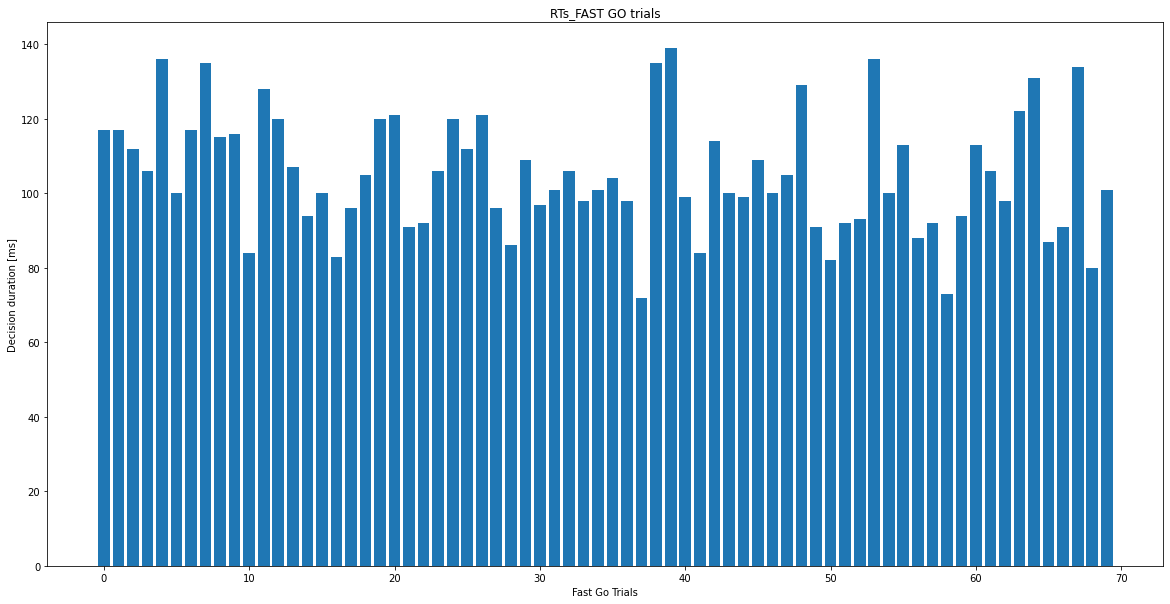

In [38]:
plt.figure(figsize=(20,10))
i = np.arange(len(fast))
#print(i)
plt.bar([i for i in range(len(fast))], fast, width=0.8, align='center')
#plt.axis([0, 160, 0, 300]) 
#axis([xmin,xmax,ymin,ymax])
plt.xlabel('Fast Go Trials')
plt.ylabel('Decision duration [ms]')
plt.title('RTs_FAST GO trials')
plt.savefig('./Figures/'+'FastGO_RTs'+'_.png')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
i = np.arange(len(slow))
#print(i)
plt.bar([i for i in range(len(slow))], slow, width=0.8, align='center')
#plt.axis([0, 160, 0, 300]) 
#axis([xmin,xmax,ymin,ymax])
plt.xlabel('Slow Go Trials')
plt.ylabel('Decision duration [ms]')
plt.title('RTs_SLOW GO trials')
plt.hlines(130, -1, len(slow),linestyle='dashed',color='k')
plt.savefig('./Berke/FRs_go/'+'SlowGO_RTs'+'_.png')
plt.show()

In [40]:
fast = []
slow = []
for i in datatables[0].index:
    if datatables[0].decisionduration.iloc[i] < 140: 
        fast.append(datatables[0].decisionduration.iloc[i])
    elif datatables[0].decision.iloc[i] != 'none': 
        slow.append(datatables[0].decisionduration.iloc[i])
print(len(fast))
print(len(slow))

70
29


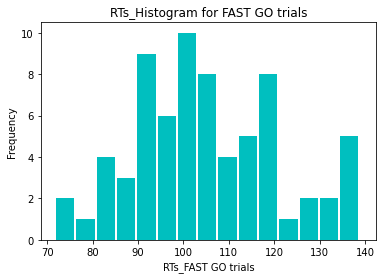

In [44]:
plt.hist(fast, bins= 15, histtype ='bar', align = 'mid', color = 'c', width = 4)
plt.xlabel('RTs_FAST GO trials')
plt.ylabel('Frequency')
plt.title('RTs_Histogram for FAST GO trials')
plt.savefig('./Figures/'+'FastGO_RTs_hist'+'_.png')
plt.show()

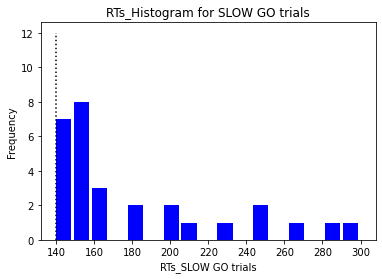

In [46]:
plt.hist(slow, bins = 17,  histtype ='bar', align = 'mid', color = 'b', width = 8)
plt.xlabel('RTs_SLOW GO trials')
plt.ylabel('Frequency')
plt.vlines(140, 0, 12, linestyle = 'dotted', color = 'k')
plt.title('RTs_Histogram for SLOW GO trials')
plt.savefig('./Figures/'+'SlowGO_RTs_hist'+'_.png')
plt.show()

In [47]:
results = cbgt.loadResults('./Data/1chann_sample_100trials_gotrials_seed4086296')

In [48]:
results[0].keys()

dict_keys(['popfreqs', 'popdata', 'datatables'])

In [49]:
datatables = results[0]['datatables']

In [50]:
datatables

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,right,0,186,186,487,487,right,1.0
1,right,1088,1205,117,418,1506,left,1.0
2,right,2107,2224,117,418,2525,left,0.0
3,right,3126,3238,112,413,3539,right,1.0
4,right,4140,4246,106,407,4547,left,0.0
...,...,...,...,...,...,...,...,...
95,right,98087,98178,91,392,98479,left,0.0
96,right,99080,99214,134,435,99515,left,0.0
97,right,100116,100196,80,381,100497,left,0.0
98,right,101098,101240,142,443,101541,left,0.0


In [52]:
fast = []
slow = []
for i in datatables.index:
    if datatables.decisionduration.iloc[i] < 140: 
        fast.append(datatables.decisionduration.iloc[i])
    elif datatables.decision.iloc[i] != 'none': 
        slow.append(datatables.decisionduration.iloc[i])
print(len(fast))
print(len(slow))

70
29


In [53]:
print(min(fast))
print(max(slow))
print(min(slow))

72
300
140


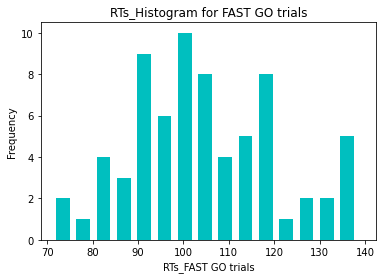

In [55]:
plt.hist(fast, bins= 15, histtype ='bar', align = 'mid', color = 'c', width = 3)
plt.xlabel('RTs_FAST GO trials')
plt.ylabel('Frequency')
plt.title('RTs_Histogram for FAST GO trials')
plt.savefig('./Figures/'+'double_FastGO_RTs_hist'+'_.png')
plt.show()

In [ ]:
plt.hist(slow, bins = 17,  histtype ='bar', align = 'mid', color = 'b', width = 9)
plt.xlabel('RTs_SLOW GO trials')
plt.ylabel('Frequency')
plt.vlines(130, 0,25, linestyle = 'dotted', color = 'k')
plt.title('RTs_Histogram for SLOW GO trials')
plt.savefig('./Berke/FRs_go/'+'double_SLowGO_RTs_hist'+'_.png')
plt.show()

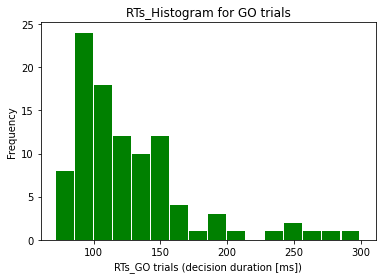

In [56]:
rts = []
for i in datatables.index:
    if datatables.decision.iloc[i] != 'none':
        rts.append(datatables.decisionduration.iloc[i])
plt.hist(rts, bins = 16, histtype ='bar', align = 'mid', color = 'g', width = 13)
plt.xlabel('RTs_GO trials (decision duration [ms])')
plt.ylabel('Frequency')
plt.title('RTs_Histogram for GO trials')
plt.savefig('./Figures/'+'GO_RTs_hist'+'_.png')
plt.show()

In [ ]:
len(rts)

In [ ]:
late = 0
trials_late = []
for i in datatables.index:
    if datatables.decisionduration.iloc[i] > 280: 
        late +=1
        trials_late.append(i)
print(late) 
print(trials_late)

In [ ]:
stop = 0
for i in datatables.index:
    if datatables.decision.iloc[i] == 'stop': 
        stop += 1
print(stop)

In [ ]:
datatables[:][0].stimulusstarttime

In [ ]:
results[0]['popfreqs']

In [59]:
import statistics

plt_func.rename_columns(results[0])
ratedf = results[0]['popfreqs']
keysInicials=[]
keysFinals=[]
datatables = cbgt.collateVariable(results,'datatables')

#find the inicial key of each trial
for j in datatables[:][0].stimulusstarttime:
    i=0
    noTrobat=0
    while noTrobat==0 and i<len(ratedf['Time (ms)']):
        if ratedf['Time (ms)'][i]<j:
            i=i+1
        else: 
            noTrobat=1 
    keysInicials.append(i)

keysInicials_fastgo = []
keysInicials_slowgo = []

for z in datatables[:][0].index: #fast go
    if datatables[:][0].decisionduration[z] < 140 and datatables[:][0].decision[z] != 'none':
        keysInicials_fastgo.append(datatables[:][0].stimulusstarttime[z])

for z in datatables[:][0].index: #slow go
    if datatables[:][0].decisionduration[z] >= 140 and datatables[:][0].decision[z] != 'none':
        keysInicials_slowgo.append(datatables[:][0].stimulusstarttime[z])


#print('Inicials', keysInicials)
#print('Inicials Fast Go', keysInicials_fastgo)
#print('Inicials Slow Go', keysInicials_slowgo)

#find the final key of each trial

for j in datatables[:][0].rewardtime:
    i=0
    noTrobat=0
    while noTrobat==0 and i<len(ratedf['Time (ms)']):
        if ratedf['Time (ms)'][i]<j:
            i=i+1
        else: 
            noTrobat=1    
    keysFinals.append(i-1)  
    
keysFinals_fastgo = []
keysFinals_slowgo = []

for z in datatables[:][0].index: #fast go
    if datatables[:][0].decisionduration[z] < 140 and datatables[:][0].decision[z] != 'none':
        keysFinals_fastgo.append(datatables[:][0].rewardtime[z])
    
for z in datatables[:][0].index: #slow go
    if datatables[:][0].decisionduration[z] >= 140 and datatables[:][0].decision[z] != 'none':
        keysFinals_slowgo.append(datatables[:][0].rewardtime[z])

#print('Finals', keysFinals)
#print('Finals Fast Go', keysFinals_fastgo)
#print('Finals Slow Go', keysFinals_slowgo)

#find the length of the largest trial 
dif=[]
for i in range(0,len(keysInicials_slowgo)):
    dif.append(keysFinals_slowgo[i]-keysInicials_slowgo[i])
L=max(dif)
print(L)

#find the length of the largest trial of the Fast go trials
dif_fast=[]
for i in range(0,len(keysInicials_fastgo)):
    dif_fast.append(keysFinals_fastgo[i]-keysInicials_fastgo[i])
L_fast=max(dif_fast)
print(L_fast)

601
440


In [60]:
print(len(keysInicials_fastgo))
print(len(keysInicials_slowgo))

70
29


In [61]:
#SLOW GO trials - DATATABLES + FRs
rows_list = []
ratedf = results[0]['popfreqs']
ratedf_sg = pd.DataFrame()
for row in datatables[:][0].index: 
    if datatables[:][0].decisionduration[row] >= 140 and datatables[:][0].decision[row] != 'none':
        dict_aux = {}
        dict_aux.update(datatables[:][0].iloc[row]) 
        rows_list.append(dict_aux)
        ratedf_sg = ratedf_sg.append(ratedf[datatables[:][0].iloc[row]['stimulusstarttime']:datatables[0].iloc[row]['rewardtime']+601])
slow_go = pd.DataFrame(rows_list) 
print(len(slow_go))
print(len(ratedf_sg))

29
31433


In [62]:
#become all datatables of the same length

# SLOW GO 

Mean_newDic_s={}
Std_newDic_s={}

for BGregion in ratedf_sg:
    
    S=[]
    for i in range(0,len(keysInicials_slowgo)):
        region_i=ratedf[keysInicials_slowgo[i]:keysFinals_slowgo[i]].to_dict()
        region_i=list(region_i[BGregion].values())
        #print(region_i)
        li=len(region_i)
        #print(li)
        j=1
        while j<=L-li:
            region_i = region_i + [-1]
            j=j+1
            #print('dentro')
        S.append(region_i)
    #print(S)
    mean_t=[]
    std_t=[]
    for i in range(0,L):
        new_list=[]
        for ll in S:
            #print(ll)
            if ll[i]!= -1:
                new_list.append(ll[i])
                #print(new_list)
                #print(len(new_list))
                #print(ll[i-1])
        if len(new_list) > 1:
            mean_t.append(statistics.mean(new_list)) #sum(new_list)/len(new_list))
            std_t.append(statistics.stdev(new_list))
        else:
            for ll in S: 
                if ll[i]!= -1:
                    mean_t.append(ll[i])
                    std_t.append(0)
    
    Mean_newDic_s[BGregion]=mean_t
    Std_newDic_s[BGregion]=std_t
    
#print(Mean_newDic)
#print()
#print('new_list', new_list)

In [63]:
#FAST GO trials - DATATABLES + FRs
rows_list = []
ratedf = results[0]['popfreqs']
ratedf_fg = pd.DataFrame()
for row in datatables[:][0].index:
    if datatables[:][0].decisionduration[row] < 140: 
        dict_aux = {}
        dict_aux.update(datatables[:][0].iloc[row]) 
        rows_list.append(dict_aux)
        ratedf_fg = ratedf_fg.append(ratedf[datatables[:][0].iloc[row]['stimulusstarttime']:datatables[:][0].iloc[row]['rewardtime']+601])
fast_go = pd.DataFrame(rows_list) 
print(len(fast_go))
print(len(ratedf_fg))

70
70509


In [64]:
#become all datatables of the same length

# FAST GO 

Mean_newDic_f={}
Std_newDic_f={}

for BGregion in ratedf_fg:
    
    S=[]
    for i in range(0,len(keysInicials_fastgo)):
        region_i=ratedf[keysInicials_fastgo[i]:keysFinals_fastgo[i]].to_dict()
        region_i=list(region_i[BGregion].values())
        #print(region_i)
        li=len(region_i)
        #print(li)
        j=1
        while j<=L-li:
            region_i = region_i + [-1]
            j=j+1
            #print('dentro')
        S.append(region_i)
    #print(S)
    mean_t=[]
    std_t=[]
    for i in range(0,L):
        new_list=[]
        for ll in S:
            #print(ll)
            if ll[i]!= -1:
                new_list.append(ll[i])
                #print(new_list)
                #print(len(new_list))
                #print(ll[i-1])
        if len(new_list) > 1:
            mean_t.append(statistics.mean(new_list)) #sum(new_list)/len(new_list))
            std_t.append(statistics.stdev(new_list))
        else:
            for ll in S: 
                if ll[i]!= -1:
                    mean_t.append(ll[i])
                    std_t.append(0)
    
    Mean_newDic_f[BGregion]=mean_t
    Std_newDic_f[BGregion]=std_t
    
#print(Mean_newDic)
#print()
#print('new_list', new_list)

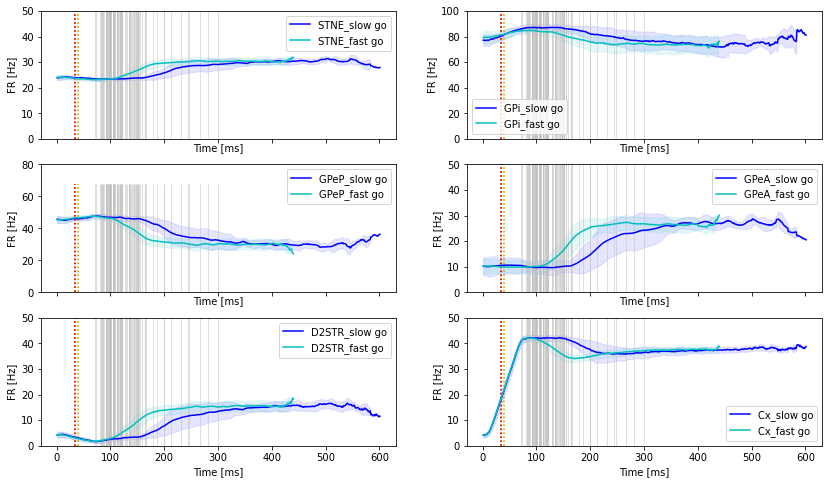

In [69]:
#OVERLAP STN and GPi MEAN FRs

f, (ax1, ax2, ax3) = plt.subplots(3, 2, figsize=(14,8), sharex=True)

i=0
tmean_s=[]
while i<len(Mean_newDic_s['Cx_left']):
    tmean_s.append(len(Mean_newDic_s['Cx_left'])-i)
    i=i+1
tmean_s.sort()
#print(tmean)

i=0
tmean_f=[]
while i<len(Mean_newDic_f['Cx_left']):
    tmean_f.append(len(Mean_newDic_f['Cx_left'])-i)
    i=i+1
tmean_f.sort()
#print(tmean)

#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax1[0].plot(tmean_s,Mean_newDic_s['STNE_right'], color = 'b', label = 'STNE_slow go')
ax1[0].fill_between(tmean_s,np.subtract(Mean_newDic_s['STNE_right'],Std_newDic_s['STNE_right']),np.add(Mean_newDic_s['STNE_right'],Std_newDic_s['STNE_right']),color='b', alpha=.1)
ax1[0].set_xlabel('Time [ms]')
ax1[0].set_ylabel('FR [Hz]')
ax1[0].set_ylim(0, 50)
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(slow_go)):
    ax1[0].vlines(slow_go.decisionduration[i], 0, max(Mean_newDic_s['STNE_right'])+20, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax1[0].vlines(35, 0, max(Mean_newDic_s['STNE_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax1[0].vlines(40, 0, max(Mean_newDic_s['STNE_right'])+20, colors='y', linewidth = 1.5, linestyle = 'dotted')

#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax1[0].plot(tmean_f,Mean_newDic_f['STNE_right'], color = 'c', label = 'STNE_fast go')
ax1[0].fill_between(tmean_f,np.subtract(Mean_newDic_f['STNE_right'],Std_newDic_f['STNE_right']),np.add(Mean_newDic_f['STNE_right'],Std_newDic_f['STNE_right']),color='c', alpha=.1)
ax1[0].legend(['STNE_slow go', 'STNE_fast go'])
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(fast_go)):
    ax1[0].vlines(fast_go.decisionduration[i], 0, max(Mean_newDic_f['STNE_right'])+20, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax1[0].vlines(35, 0, max(Mean_newDic_f['STNE_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax1[0].vlines(40, 0, max(Mean_newDic_f['STNE_right'])+20, colors='y', linewidth = 1.5, linestyle = 'dotted')

ax1[1].plot(tmean_s,Mean_newDic_s['GPi_right'], color = 'b', label = 'GPi_slow go')
ax1[1].fill_between(tmean_s,np.subtract(Mean_newDic_s['GPi_right'],Std_newDic_s['GPi_right']),np.add(Mean_newDic_s['GPi_right'],Std_newDic_s['GPi_right']),color='b', alpha=.1)
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(slow_go)):
    ax1[1].vlines(slow_go.decisionduration[i], 0, max(Mean_newDic_s['GPi_right'])+40, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax1[1].vlines(35, 0, max(Mean_newDic_s['GPi_right'])+40, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax1[1].vlines(40, 0, max(Mean_newDic_s['GPi_right'])+40, colors='y', linewidth = 1.5, linestyle = 'dotted')
ax1[1].set_ylim(0, 100) 

#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax1[1].plot(tmean_f,Mean_newDic_f['GPi_right'], color = 'c', label = 'GPi_fast go')
ax1[1].fill_between(tmean_f,np.subtract(Mean_newDic_f['GPi_right'],Std_newDic_f['GPi_right']),np.add(Mean_newDic_f['GPi_right'],Std_newDic_f['GPi_right']),color='c', alpha=.1)
ax1[1].legend(['GPi_slow go', 'GPi_fast go']) #(['STN_A','STN_B'])
ax1[1].set_xlabel('Time [ms]')
ax1[1].set_ylabel('FR [Hz]')
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
#ax1[1].legend(['GPi_failed stop'])
for i in range(0,len(fast_go)):
    ax1[1].vlines(fast_go.decisionduration[i], 0, max(Mean_newDic_f['GPi_right'])+40, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax1[1].vlines(35, 0, max(Mean_newDic_f['GPi_right'])+40, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax1[1].vlines(40, 0, max(Mean_newDic_f['GPi_right'])+40, colors='y', linewidth = 1.5, linestyle = 'dotted')

ax2[0].plot(tmean_s,Mean_newDic_s['GPeP_right'], color = 'b', label = 'GPeP_slow go')
ax2[0].fill_between(tmean_s,np.subtract(Mean_newDic_s['GPeP_right'],Std_newDic_s['GPeP_right']),np.add(Mean_newDic_s['GPeP_right'],Std_newDic_s['GPeP_right']),color='b', alpha=.1)
ax2[0].set_xlabel('Time [ms]')
ax2[0].set_ylabel('FR [Hz]')
ax2[0].set_ylim(0, 80)
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(slow_go)):
    ax2[0].vlines(slow_go.decisionduration[i], 0, max(Mean_newDic_s['GPeP_right'])+20, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax2[0].vlines(35, 0, max(Mean_newDic_s['GPeP_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax2[0].vlines(40, 0, max(Mean_newDic_s['GPeP_right'])+20, colors='y', linewidth = 1.5, linestyle = 'dotted')

#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax2[0].plot(tmean_f,Mean_newDic_f['GPeP_right'], color = 'c', label = 'GPeP_fast go')
ax2[0].fill_between(tmean_f,np.subtract(Mean_newDic_f['GPeP_right'],Std_newDic_f['GPeP_right']),np.add(Mean_newDic_f['GPeP_right'],Std_newDic_f['GPeP_right']),color='c', alpha=.1)
ax2[0].legend(['GPeP_slow go', 'GPeP_fast go'])
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(fast_go)):
    ax2[0].vlines(fast_go.decisionduration[i], 0, max(Mean_newDic_f['GPeP_right'])+20, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax2[0].vlines(35, 0, max(Mean_newDic_f['GPeP_right'])+20, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax2[0].vlines(40, 0, max(Mean_newDic_f['GPeP_right'])+20, colors='y', linewidth = 1.5, linestyle = 'dotted')

ax2[1].plot(tmean_s,Mean_newDic_s['GPeA_right'], color = 'b', label = 'GPeA_slow go')
ax2[1].fill_between(tmean_s,np.subtract(Mean_newDic_s['GPeA_right'],Std_newDic_s['GPeA_right']),np.add(Mean_newDic_s['GPeA_right'],Std_newDic_s['GPeA_right']),color='b', alpha=.1)
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(slow_go)):
    ax2[1].vlines(slow_go.decisionduration[i], 0, max(Mean_newDic_s['GPeA_right'])+40, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax2[1].vlines(35, 0, max(Mean_newDic_s['GPeA_right'])+40, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax2[1].vlines(40, 0, max(Mean_newDic_s['GPeA_right'])+40, colors='y', linewidth = 1.5, linestyle = 'dotted')
ax2[1].set_ylim(0, 50) 

#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax2[1].plot(tmean_f,Mean_newDic_f['GPeA_right'], color = 'c', label = 'GPeA_fast go')
ax2[1].fill_between(tmean_f,np.subtract(Mean_newDic_f['GPeA_right'],Std_newDic_f['GPeA_right']),np.add(Mean_newDic_f['GPeA_right'],Std_newDic_f['GPeA_right']),color='c', alpha=.1)
ax2[1].legend(['GPeA_slow go', 'GPeA_fast go']) #(['STN_A','STN_B'])
ax2[1].set_xlabel('Time [ms]')
ax2[1].set_ylabel('FR [Hz]')
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
#ax1[1].legend(['GPi_failed stop'])
for i in range(0,len(fast_go)):
    ax2[1].vlines(fast_go.decisionduration[i], 0, max(Mean_newDic_f['GPeA_right'])+40, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax2[1].vlines(35, 0, max(Mean_newDic_f['GPeA_right'])+40, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax2[1].vlines(40, 0, max(Mean_newDic_f['GPeA_right'])+40, colors='y', linewidth = 1.5, linestyle = 'dotted')

ax3[0].plot(tmean_s,Mean_newDic_s['D2STR_right'], color = 'b', label = 'D2STR_slow go')
ax3[0].fill_between(tmean_s,np.subtract(Mean_newDic_s['D2STR_right'],Std_newDic_s['D2STR_right']),np.add(Mean_newDic_s['D2STR_right'],Std_newDic_s['D2STR_right']),color='b', alpha=.1)
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(slow_go)):
    ax3[0].vlines(slow_go.decisionduration[i], 0, max(Mean_newDic_s['D2STR_right'])+40, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax3[0].vlines(35, 0, max(Mean_newDic_s['D2STR_right'])+40, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax3[0].vlines(40, 0, max(Mean_newDic_s['D2STR_right'])+40, colors='y', linewidth = 1.5, linestyle = 'dotted')
ax3[0].set_ylim(0, 50) 

#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax3[0].plot(tmean_f,Mean_newDic_f['D2STR_right'], color = 'c', label = 'D2STR_fast go')
ax3[0].fill_between(tmean_f,np.subtract(Mean_newDic_f['D2STR_right'],Std_newDic_f['D2STR_right']),np.add(Mean_newDic_f['D2STR_right'],Std_newDic_f['D2STR_right']),color='c', alpha=.1)
ax3[0].legend(['D2STR_slow go', 'D2STR_fast go']) #(['STN_A','STN_B'])
ax3[0].set_xlabel('Time [ms]')
ax3[0].set_ylabel('FR [Hz]')
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
#ax1[1].legend(['GPi_failed stop'])
for i in range(0,len(fast_go)):
    ax3[0].vlines(fast_go.decisionduration[i], 0, max(Mean_newDic_f['D2STR_right'])+40, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax3[0].vlines(35, 0, max(Mean_newDic_f['D2STR_right'])+40, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax3[0].vlines(40, 0, max(Mean_newDic_f['D2STR_right'])+40, colors='y', linewidth = 1.5, linestyle = 'dotted')

ax3[1].plot(tmean_s,Mean_newDic_s['Cx_right'], color = 'b', label = 'Cx_slow go')
ax3[1].fill_between(tmean_s,np.subtract(Mean_newDic_s['Cx_right'],Std_newDic_s['Cx_right']),np.add(Mean_newDic_s['Cx_right'],Std_newDic_s['Cx_right']),color='b', alpha=.1)
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(slow_go)):
    ax3[1].vlines(slow_go.decisionduration[i], 0, max(Mean_newDic_s['Cx_right'])+40, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax3[1].vlines(35, 0, max(Mean_newDic_s['Cx_right'])+40, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax3[1].vlines(40, 0, max(Mean_newDic_s['Cx_right'])+40, colors='y', linewidth = 1.5, linestyle = 'dotted')
ax3[1].set_ylim(0, 50) 

#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax3[1].plot(tmean_f,Mean_newDic_f['Cx_right'], color = 'c', label = 'Cx_fast go')
ax3[1].fill_between(tmean_f,np.subtract(Mean_newDic_f['Cx_right'],Std_newDic_f['Cx_right']),np.add(Mean_newDic_f['Cx_right'],Std_newDic_f['Cx_right']),color='c', alpha=.1)
ax3[1].legend(['Cx_slow go', 'Cx_fast go']) #(['STN_A','STN_B'])
ax3[1].set_xlabel('Time [ms]')
ax3[1].set_ylabel('FR [Hz]')
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
#ax1[1].legend(['GPi_failed stop'])
for i in range(0,len(fast_go)):
    ax3[1].vlines(fast_go.decisionduration[i], 0, max(Mean_newDic_f['Cx_right'])+40, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax3[1].vlines(35, 0, max(Mean_newDic_f['Cx_right'])+40, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax3[1].vlines(40, 0, max(Mean_newDic_f['Cx_right'])+40, colors='y', linewidth = 1.5, linestyle = 'dotted')

plt.savefig('./Figures/gotrials_meanFR_trials_1chann_OVERLAP.png', dpi=400)

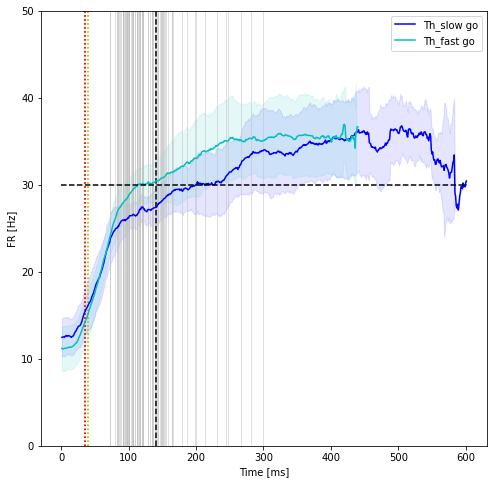

In [74]:
f, (ax1) = plt.subplots(1, 1, figsize=(8,8), sharex=True)

ax1.plot(tmean_s,Mean_newDic_s['Th_right'], color = 'b', label = 'Th_slow go')
ax1.fill_between(tmean_s,np.subtract(Mean_newDic_s['Th_right'],Std_newDic_s['Th_right']),np.add(Mean_newDic_s['Th_right'],Std_newDic_s['Th_right']),color='b', alpha=.1)
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
for i in range(0,len(slow_go)):
    ax1.vlines(slow_go.decisionduration[i], 0, max(Mean_newDic_s['Th_right'])+40, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax1.vlines(35, 0, max(Mean_newDic_s['Th_right'])+40, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax1.vlines(40, 0, max(Mean_newDic_s['Th_right'])+40, colors='y', linewidth = 1.5, linestyle = 'dotted')
ax1.set_ylim(0, 50) 

#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax1.plot(tmean_f,Mean_newDic_f['Th_right'], color = 'c', label = 'Th_fast go')
ax1.fill_between(tmean_f,np.subtract(Mean_newDic_f['Th_right'],Std_newDic_f['Th_right']),np.add(Mean_newDic_f['Th_right'],Std_newDic_f['Th_right']),color='c', alpha=.1)
ax1.legend(['Th_slow go', 'Th_fast go']) #(['STN_A','STN_B'])
ax1.set_xlabel('Time [ms]')
ax1.set_ylabel('FR [Hz]')
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')
#ax1[1].legend(['GPi_failed stop'])
for i in range(0,len(fast_go)):
    ax1.vlines(fast_go.decisionduration[i], 0, max(Mean_newDic_f['Th_right'])+40, color='silver', linewidth = 0.5)
#if results[0]['stop_signal_present'] == True: 
ax1.vlines(35, 0, max(Mean_newDic_f['Th_right'])+40, colors='r', linewidth = 1.5, linestyle = 'dotted')
ax1.vlines(40, 0, max(Mean_newDic_f['Th_right'])+40, colors='y', linewidth = 1.5, linestyle = 'dotted')
ax1.plot([0, 602],[30, 30],linestyle='dashed',color='k')
ax1.vlines(140, 0, max(Mean_newDic_f['Th_right'])+40, colors='k', linewidth = 1.5, linestyle = 'dashed')

plt.savefig('./Figures/gotrials_meanFR_trials_1chann_OVERLAP_Th.png', dpi=400)